Ζιάμπρας Στέφανος (10351), Ρουσομάνης Γεώργιος (10703)

# Εργασία Αριθμητικής Ανάλυσης

Θεωρούμε πως έχουμε το ακόλουθο σύστημα διαφορικών εξισώσεων:

$ \mathit{Υ' = -\alphaΥ Ε} $ <br>
$ \mathit{Ε' = \alphaΥ Ε - \betaΕ} $ <br>
$ \mathcal{Τ' = \betaΕ} $ <br>

όπου:
 - $\mathit{Υ = Υ(t)}$ ο αριθμός των υποψηφίων κρουσμάτων τη μέρα $\mathit{t}$, $\mathit{Y(0) = 235}$
 - $\mathit{E = E(t)}$ ο αριθμός των επιβεβαιωμένων κρουσμάτων τη μέρα $\mathit{t}$, $\mathit{E(0) = 14}$
 - $\mathit{T = T(t)}$ ο αριθμός των τελικών κρουσμάτων τη μέρα $\mathit{t}$, $\mathit{T(0) = 0}$

και $\mathit{\alpha, \beta}$ παράμετροι. Θέλουμε να προσδιορίσουμε τις τιμές των $\mathit{\alpha}$ και $\mathit{\beta}$ έτσι ώστε η λύση του παραπάνω μαθηματικού μοντέλου να δίνει αποτέλεσματα όσο το δυνατόν πιο κοντά σε αυτά του παρακάτω πίνακα.

| Ημέρα | Ύποπτα (Y) | Επιβεβαιωμένα (E) |
| --- | --- | --- |
| 0 | 235 | 14 |
| 16 | 201 | 22 |
| 31 | 153 | 29 |
| 47 | 121 | 21 |
| 62 | 108 | 8 |
| 78 | 97 | 8 |
| 109 | 83 | 0 |

Αρχικά, χρησιμοποιώντας τη μέθοδο trial and error, θέλουμε να κάνουμε μία πρώτη εκτίμηση των $\mathit{\alpha}$ και $\mathit{\beta}$ έτσι ώστε η γραφική παράσταση της λύσης του συστήματος να μοιάζει με τα διακριτά σημεία που θέλουμε να προσεγγίσουμε. Όπως διαπιστώσαμε, μία καλή πρώτη εκτίμηση των παραμέτρων είναι ιδιαιτέρως σημαντική, καθώς σε διαφορετική περίπτωση η μέθοδος ελαχιστοποίησης τετραγωνικών σφαλμάτων που χρησιμοποιείται στη συνέχεια, ενδέχεται να μην συγκλίνει στα εν λόγω σημεία. Έτσι θεωρήσαμε ότι καλές αρχικές τιμές των $\mathit{\alpha}$ και $\mathit{\beta}$ είναι οι παρακάτω:

In [1]:
# make a first estimation of a & b using trial and error method
a = 0.0007
b = 0.07

Ακολουθεί η εφαρμογή της μεθόδου Runge Kutta 4ης τάξης και η αρχικοποίηση των παραμέτρων για το συγκεκριμένο πρόβλημα:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# initialize start time and finish time
ts = 0.0
tf = 109.0

# set precision of Runge Kutta method
n = 10000

# data from the table
days = np.array([0, 16, 31, 47, 62, 78, 109])
data_Y = np.array([235., 201., 153., 121., 108., 97., 83.])
data_E = np.array([14., 22., 29., 21., 8., 8., 0.])



def dfdt(y, a, b):
    return np.array([- a * y[0] * y[1], 
                     a * y[0] * y[1] - b * y[1],
                     b * y[1]])


"""
   @param t_i: 1d-array 
       stores the moments which corresponds to the first collumn of the table
   @param a: float
       parameter a we want to evaluate
   @param b: float
       parameter b we want to evaluate
   @param y_0: 1d-array of M elements
       stores the initial conditions of the system 
   @param rk_YET: 2d-array of M x n + 1 dimensions
       stores the solution of the system for given a & b
   
   @return: two 1d-arrays with the same length as t_i which hold the corresponding values of Y and T
   at the moments specified by t_i
"""


def rungeKutta(t_i, a, b, y_0, rk_YET):
    h = (float)((tf - ts) / n)
    rk_Y = np.arange(len(t_i), dtype = float)    # stores the values of Y at the moments specified by t_i array
    rk_E = np.arange(len(t_i), dtype = float)    # stores the values of Y at the moments specified by t_i array
    
    for j in range(0, len(y_0)):
        rk_YET[j][0] = y_0[j]
    
    for i in range(1, n + 1):
        k0 = h * dfdt(y_0, a, b)
        k1 = h * dfdt(y_0 + 0.5 * k0, a, b)
        k2 = h * dfdt(y_0 + 0.5 * k1, a, b)
        k3 = h * dfdt(y_0 + k2, a, b)
        y_0 = y_0 + (1.0 / 6)*(k0 + 2*k1 + 2*k2 + k3)
        for j in range(0, 3):
            rk_YET[j][i] = y_0[j]
        
    # initialize the arrays to be returned
    dt = (float)((tf - ts) /  n)
    for i in range (0, len(t_i)):
        rk_Y[i] = rk_YET[0][(int)(days[i] / dt)]
        rk_E[i] = rk_YET[1][(int)(days[i] / dt)]
    
    return (rk_Y, rk_E)
    

    
y_0 = np.array([235., 14., 0.])          # initial conditions
rk_YET = np.empty((3, n + 1), float)     # 3 x n + 1 array which stores the solution of the system
t = np.linspace(ts, tf, n + 1)           # time division


rk_Y, rk_E = rungeKutta(days, a, b, y_0, rk_YET) 

Στη συνέχεια οπτικοποιούμε τη λύση του συστήματος που προέκυψε για τις αρχικές τιμές των $\mathit{\alpha}$ και $\mathit{\beta}$ σε συνδιασμό με τα δεδομένα του πίνακα. Παρατηρούμε ότι οι καμπύλες προσεγγίζουν ελαφρώς τα δεδομένα επομένως η αρχική μας εκτίμηση είναι αποδεκτή.

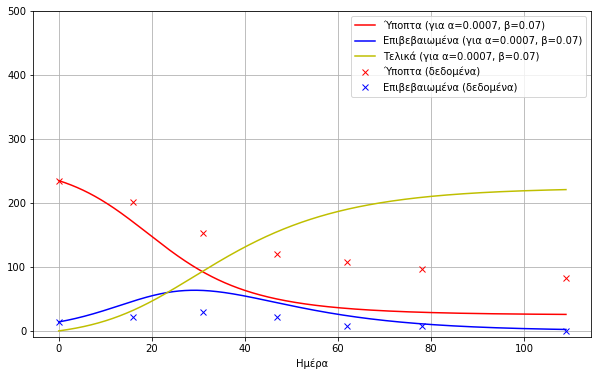

In [3]:
# plots the solution of the system for specific a & b
plt.figure(figsize = (10, 6))
plt.plot(t, rk_YET[0], 'r', label = f'Ύποπτα (για α={a}, β={b})')
plt.plot(t, rk_YET[1], 'b', label = f'Επιβεβαιωμένα (για α={a}, β={b})')
plt.plot(t, rk_YET[2], 'y', label = f'Τελικά (για α={a}, β={b})')


# plots the data from the table
plt.plot(days, data_Y, 'rx', label = 'Ύποπτα (δεδομένα)')
plt.plot(days, data_E, 'bx', label = 'Επιβεβαιωμένα (δεδομένα)')

plt.xlabel("Ημέρα")
plt.legend()
plt.ylim(-10, 500)
plt.grid()
plt.show()

Στον πίνακα που ακολουθεί παρατίθενται τα δεδομένα που προέκυψαν από τη λύση του συστήματος (στήλες με το προσδιοριστικό RK) σε σύγκριση με αυτά της εκφώνησης, ενώ γίνεται και ο υπολογισμός του εκάστοτε απόλυτου σφάλματος.

In [4]:
def display_table():
    data = np.empty((len(days) + 1, 7), dtype = object)
    decimals = 3
    avg_error_Y = 0.
    avg_error_E = 0.
    for i in range(0, len(days)):
        error_Y = abs(data_Y[i] - rk_Y[i])
        error_E = abs(data_E[i] - rk_E[i])
        avg_error_Y += error_Y
        avg_error_E += error_E
        data[i][0] = days[i]
        data[i][1] = round(data_Y[i], decimals)
        data[i][2] = round(rk_Y[i], decimals)
        data[i][3] = round(error_Y, decimals)
        data[i][4] = round(data_E[i], decimals)
        data[i][5] = round(rk_E[i], decimals)
        data[i][6] = round(error_E, decimals)
    for i in range(0, len(data[7])):
        data[7][i] = '-'
    data[7][0] = 'Μέσο απόλυτο σφάλμα:'
    data[7][3] = round(avg_error_Y / len(days), decimals)
    data[7][6] = round(avg_error_E / len(days), decimals)
    return pd.DataFrame(data, columns=[" Ημέρα ", " Ύποπτα ", " Ύποπτα - RK ", " Απόλυτο Σφάλμα ", 
                                " Επιβεβαιωμένα ", " Επιβεβαιωμένα - RK ", " Απόλυτο Σφάλμα "])


display_table()

,Ημέρα,Ύποπτα,Ύποπτα - RK,Απόλυτο Σφάλμα,Επιβεβαιωμένα,Επιβεβαιωμένα - RK,Απόλυτο Σφάλμα
0,0,235.0,235.0,0.0,14.0,14.0,0.0
1,16,201.0,170.307,30.693,22.0,46.495,24.495
2,31,153.0,92.238,60.762,29.0,63.241,34.241
3,47,121.0,49.743,71.257,21.0,43.986,22.986
4,62,108.0,35.081,72.919,8.0,23.726,15.726
5,78,97.0,29.109,67.891,8.0,11.037,3.037
6,109,83.0,25.794,57.206,0.0,2.263,2.263
7,Μέσο απόλυτο σφάλμα:,-,-,51.533,-,-,14.678


Τώρα θέλουμε να προσδιορίσουμε τις νέες τιμές των $\mathit{\alpha}$ και $\mathit{\beta}$ για τις οποίες ελαχιστοποιείται το σφάλμα της αρχικής μας εκτίμησης.
<br>***Προσοχή:*** Η συγκεκριμένη διεργασία ίσως διαρκέσει λίγα λεπτά, παρακαλούμε μην διακόψετε τον kernel.

In [5]:
from scipy import optimize


rk_YE = np.arange(len(days), dtype = float)    # 1d-array which stores the sum of the two arrays returned by Runge Kutta
data_YE = data_Y + data_E

"""
@param x: 1d-array 
    stores the parameters a & b

@return: a 1d-array which is a measure of the error between Runge Kutta solution and the table's data
"""

def fun(x):
    rk_Y, rk_E = rungeKutta(days, x[0], x[1], y_0, rk_YET)
    rk_YE = rk_Y + rk_E
    return (rk_YE - data_YE)

ab = np.array([a, b])

lsq = optimize.least_squares(fun, ab, verbose = 2)

lsq.x

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.7839e+03                                    4.73e+07    
       1              2         3.0482e+03      3.74e+03       4.22e-02       5.58e+07    
       2              3         2.9499e+01      3.02e+03       1.96e-02       2.50e+06    
       3              4         2.3342e+01      6.16e+00       1.53e-04       6.50e+03    
       4              5         2.3341e+01      7.18e-04       4.31e-05       1.24e+02    
       5              6         2.3341e+01      7.44e-08       3.44e-07       1.50e+00    
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 6.7839e+03, final cost 2.3341e+01, first-order optimality 1.50e+00.


array([0.00058601, 0.0923515 ])

In [6]:
a_guess = a    # store the previous estimation of a
b_guess = b    # store the previous estimation of b
a = lsq.x[0]   # store the optimal value of a
b = lsq.x[1]   # store the optimal value of b

Έπειτα σχεδιάζουμε την γραφική παράσταση που προκύπτει για τις νέες τιμές των $\mathit{\alpha}$ και $\mathit{\beta}$, αντιπαραβάλοντάς την με την προηγούμενη λύση καθώς και με τα δεδομένα της εκφώνησης.

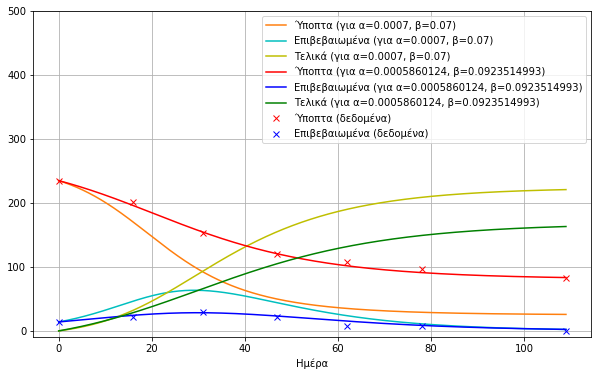

In [7]:
plt.figure(figsize = (10, 6))

# plot the first solution
rungeKutta(days, a_guess, b_guess, y_0, rk_YET)  
plt.plot(t, rk_YET[0], 'tab:orange', label = f'Ύποπτα (για α={a_guess}, β={b_guess})')
plt.plot(t, rk_YET[1], 'c', label = f'Επιβεβαιωμένα (για α={a_guess}, β={b_guess})')
plt.plot(t, rk_YET[2], 'y', label = f'Τελικά (για α={a_guess}, β={b_guess})')

# plot optimized solution
rk_Y, rk_E = rungeKutta(days, a, b, y_0, rk_YET)  
plt.plot(t, rk_YET[0], 'r', label = f'Ύποπτα (για α={round(a, 10)}, β={round(b, 10)})')
plt.plot(t, rk_YET[1], 'b', label = f'Επιβεβαιωμένα (για α={round(a, 10)}, β={round(b, 10)})')
plt.plot(t, rk_YET[2], 'g', label = f'Τελικά (για α={round(a, 10)}, β={round(b, 10)})')

# plot table's data
plt.plot(days, data_Y, 'rx', label = 'Ύποπτα (δεδομένα)')
plt.plot(days, data_E, 'bx', label = 'Επιβεβαιωμένα (δεδομένα)')

plt.xlabel("Ημέρα")
plt.legend()
plt.ylim(-10, 500)
plt.grid()
plt.show()

Οι νέες τιμές των σφαλμάτων παρατίθενται στον παρακάτω πίνακα. Παρατηρούμε ότι το μέσο απόλυτο σφάλμα για τα ύποπτα κρούσματα μειώθηκε από $\mathit{51.533}$ σε $\mathit{2.753}$ ενώ για τα επιβεβαιωμένα από $\mathit{14.678}$ σε $\mathit{2.217}$ που αντιστοιχούν σε μείωση κατά $\mathit{94.66}$% και $\mathit{84.9}$% αντίστοιχα!

In [8]:
display_table()

,Ημέρα,Ύποπτα,Ύποπτα - RK,Απόλυτο Σφάλμα,Επιβεβαιωμένα,Επιβεβαιωμένα - RK,Απόλυτο Σφάλμα
0,0,235.0,235.0,0.0,14.0,14.0,0.0
1,16,201.0,196.139,4.861,22.0,24.374,2.374
2,31,153.0,154.455,1.455,29.0,28.406,0.594
3,47,121.0,120.561,0.439,21.0,23.257,2.257
4,62,108.0,101.751,6.249,8.0,15.335,7.335
5,78,97.0,91.151,5.849,8.0,8.598,0.598
6,109,83.0,83.417,0.417,0.0,2.359,2.359
7,Μέσο απόλυτο σφάλμα:,-,-,2.753,-,-,2.217


Παρατηρώντας την τελική γραφική παράσταση φτάνουμε στο συμπέρασμα ότι η προσεγγίσεις μας είναι ικανοποιητικά κοντά στις τιμές και οι βελτιστοποιημένες τιμές των $\mathit{\alpha}$ και $\mathit{\beta}$ είναι οι παρακάτω:

In [9]:
print(f"a = {a}")
print(f"b = {b}")

a = 0.0005860124468494033
b = 0.09235149928394619
